In [7]:
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt

import plotting_fxns as pf

%load_ext autoreload
%autoreload 2

SERVER_PATH = '/Volumes/shohamy-locker/shohamy_from_labshare/rgerraty/hybrid_mri/'
LOCAL_PATH = '../'

data = pd.read_csv(LOCAL_PATH + 'hybrid_data.csv')

# raw behavioral files:
# import scipy.io
# mat = scipy.io.loadmat(SERVER_PATH + 'behavior/02_output/Performance_1.mat')
# mat['Performance'][0,0][2]# [0][0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data attributes

Data columns:

- ---------------- from original .mat files (some just in [CardGame.txt](https://github.com/rgerraty/rl_flexibility/blob/master/CardGame.txt) -----------------
- 'Sub': subject number (1-35 excluding subs 1, 3, 11, and 35)
- 'Run': run number (1-5)
- 'Trial': trial number (1-300)
- 'OldT': is one of the items old (0 or 1)
- 'Delay': how many trials since the old item was previously seen
- 'LuckyDeck': which deck is lucky on that trial (1 or 2)
- 'ObjPP': the value of the object when previously seen
- 'OldObjLuckyDeck': is the old object in the lucky deck? 1 for NO and 0 for YES (??) 
- 'ObjDeckMatch': on old trials, does the old card value match the luck of the deck it's in? (0 for YES, 1 for no ??) 
- 'Outcome': what reward did they get
- 'Resp': which side of the screen they selected (decks swapped randomly)
- 'RT': response time (ms)
- 'DeckC': deck chosen (1 = blue, 2 = red)
- 'LuckyDeckC': was lucky deck chosen (0 or 1)
- 'OldObjC': was the old object chosen when seen again (0 or 1 or nan)
- 'RevT': number of trials that the current lucky deck has been lucky (1 at the reversal)
- 'OldDeckPP': most recent outcome from the deck currently with the old card
- 'OldDeck': which deck the old item appears in
- 'EncRevT': RevT of the encoding trial
- 'Enc_Pay1': PP (prior payment) of the encoding trial
- 'OptObj': given an old object, did subject make the optimal choice? (i.e., was old value > 0.5), 0 or 1
- 'PP': most recent outcome from previous trial (prior pay)
- 'StayResp': current trial chosen deck (DeckC) is same as the last

--------------------------------- from [hybrid_data_stan.R](https://github.com/rgerraty/hybrid_reinforcement_learning/blob/master/hybrid_data_stan.R)  ---------------------------------

- 'DeckUnC': which deck was unchosen (1 or 2)
- 'ObjPP_C': centered outcome (ObjPP-0.5) but only if the old object is chosen (OldObjC)
- 'ChooseRed': was DeckC red (0 or 1)
- 'LuckRed': 0.5 is red is lucky, -0.5 if blue is lucky
- 'OldRed': 0.5 if old is red deck, -0.5 if old is blue deck, 0 if no old
- 'OldValRed': old-weighted red value: OldRed * zero-centered ObjPP (ObjPP - 0.5), 0 if no old
- 'pre_post_rev': in first half or second half of chunk between reversals (-0.5 or 0.5, median split of RevT)
- 'pre_post_rev_enc': same as above but for the old object when it was first seen, median split of EncRevT

--------------------------------- from [extract_rl_pars.R](https://github.com/rgerraty/hybrid_reinforcement_learning/blob/master/extract_RL_pars.R)  ----------------------------------

- 'Q_chosen_norm': column norm of Q_chosen
- 'Q_unchosen_norm': column norm of Q_unchosen
- 'Q_diff_norm': difference of above
- 'PE_norm': column norm of PE
- 'Q_chosen': Q value of chosen deck
- 'Q_unchosen': Q value of unchosen deck
- 'Q_diff': difference of above Q values
- 'Q_red': Q value of red deck (same as above)
- 'Q_blue': Q value of blue deck (same as above)
- 'PE': prediction error
- 'Inc_lik': (log) likelihood of incremental model
- 'Ep_lik': (log) likelihood of episodic model
- 'Inc_lik_norm': column norm of above (within subject)
- 'Ep_lik_norm': column norm of above (within subject)
- 'Lik_rat': ratio of the two (Inc_lik_norm - Ep_lik_norm) - subtracted because they are log likelihoods
- 'Ep_lik_enc': episodic likelihood on the encoding trial
- 'Ep_lik_norm_enc': column norm of above
- 'encT': trials on which old objects were first seen
- 'Lik_rat_norm': column norm of Lik_rat (within subject)

# Behavioral analyses

### Overall simple

overall participant reward/performance (per run)

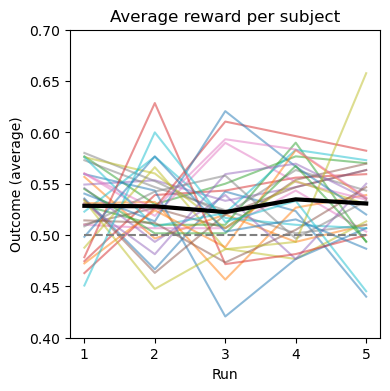

In [255]:
pf.overall_plot(data, x_var='Run', y_var='Outcome', grouping_var='Sub', mean=True,
                xticks=[1,2,3,4,5],ylim=(0.4,0.7), chance = 0.5, title ='Average reward per subject')

overall participant memory performance for each run

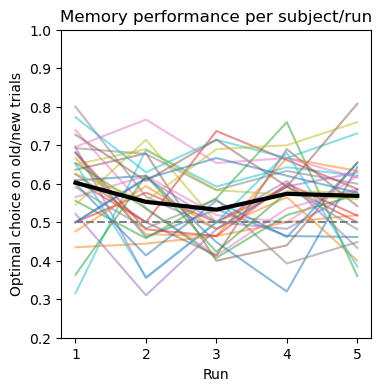

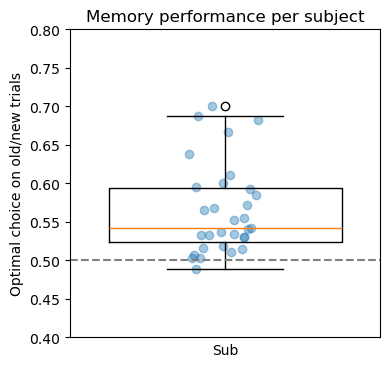

In [256]:
pf.overall_plot(data, x_var='Run', y_var='OptObj', grouping_var='Sub', mean=True,
                xticks=[1,2,3,4,5],ylim=(0.2,1), chance = 0.5, ylabel='Optimal choice on old/new trials',
                title ='Memory performance per subject/run')
pf.overall_boxplot(data, y_var='OptObj', grouping_var='Sub',ylim=(0.4,0.8), chance = 0.5, xlim=(0.9,1.1),
                   ylabel='Optimal choice on old/new trials', title ='Memory performance per subject')

did participants show an overall bias to a DeckC or a Resp? 

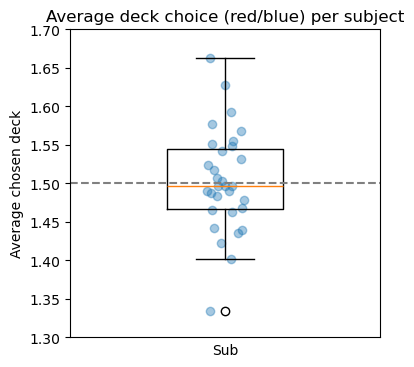

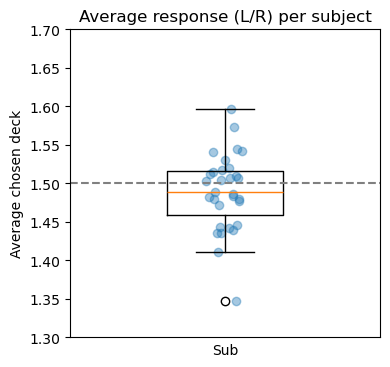

In [257]:

pf.overall_boxplot(data, y_var='DeckC', grouping_var='Sub', chance = 1.5, ylabel='Average chosen deck',
                   ylim=(1.3,1.7),xlim=(0.8,1.2),title ='Average deck choice (red/blue) per subject')
## BY RUN:
# pf.overall_plot(data, x_var='Run', y_var='DeckC', grouping_var='Sub', mean=True,
#                 xticks=[1,2,3,4,5], chance = 1.5, ylabel='Average chosen deck',ylim=(1,2),yticks=(1,1.5,2),
#                 title ='Average deck choice (red/blue) per subject')

pf.overall_boxplot(data, y_var='Resp', grouping_var='Sub', chance = 1.5, ylabel='Average chosen deck',
                   ylim=(1.3,1.7),xlim=(0.8,1.2),title ='Average response (L/R) per subject')
## BY RUN:
# pf.overall_plot(data, x_var='Run', y_var='Resp', grouping_var='Sub', mean=True,
#                 xticks=[1,2,3,4,5], chance = 1.5, ylabel='Average chosen deck',ylim=(1,2),yticks=(1,1.5,2),
#                 title ='Average response (L/R) per subject')

did last trial's payment affect this trial's deck selection?

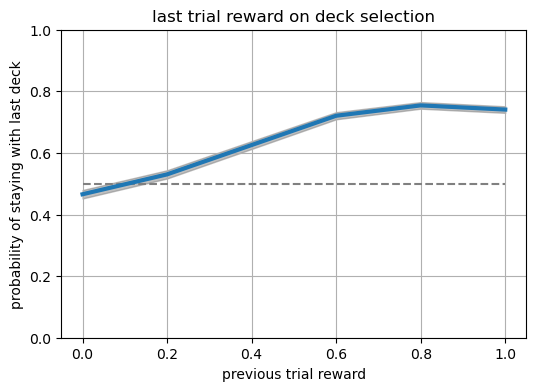

In [345]:
pf.simple_plot(data, x_var='PP', y_var = 'StayResp', ylim=(0,1), chance=0.5,
             xlabel='previous trial reward', ylabel='probability of staying with last deck',
             title='last trial reward on deck selection')

### Episodic / incremental

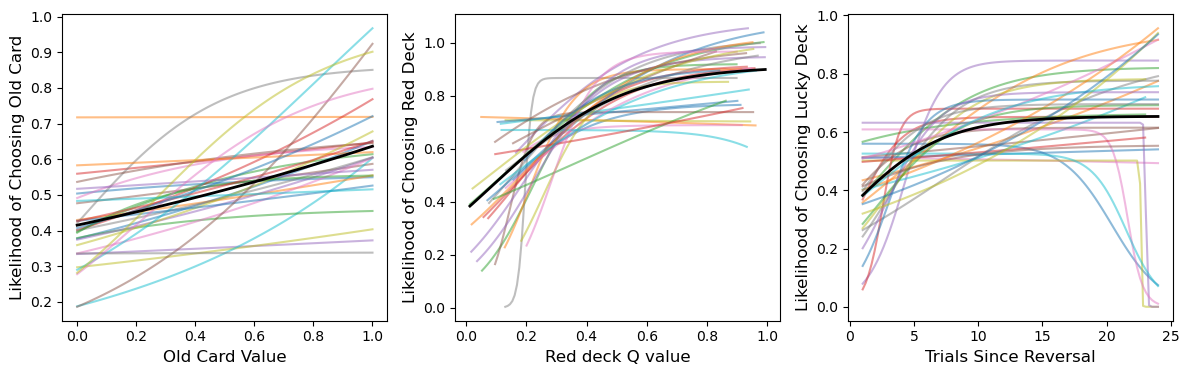

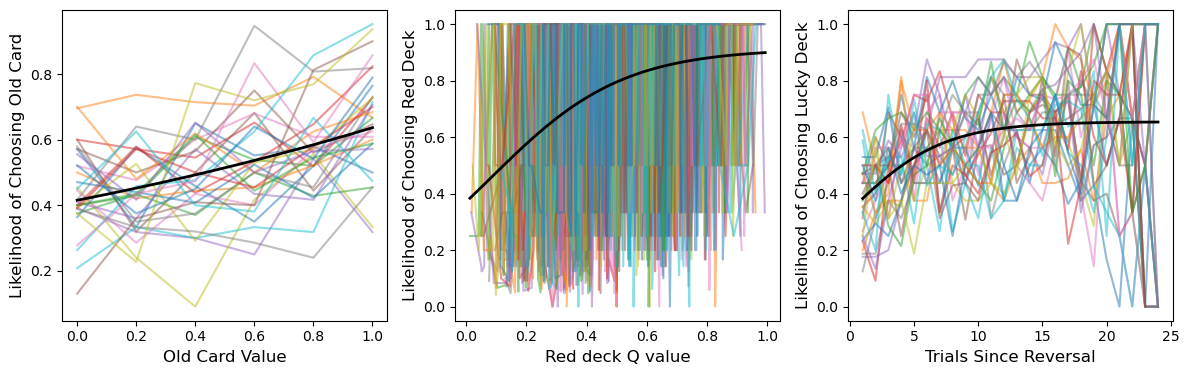

In [200]:
pf.plot_separate_subjects(data, x_cols = ['ObjPP','Q_red','RevT'], y_cols = ['OldObjC','ChooseRed','LuckyDeckC'],
                       x_texts = ["Old Card Value",'Red deck Q value','Trials Since Reversal'],
                       y_texts = ["Likelihood of Choosing Old Card", 'Likelihood of Choosing Red Deck', 'Likelihood of Choosing Lucky Deck'],
                       logistic_fit=True)
pf.plot_separate_subjects(data, x_cols = ['ObjPP','Q_red','RevT'], y_cols = ['OldObjC','ChooseRed','LuckyDeckC'],
                       x_texts = ["Old Card Value",'Red deck Q value','Trials Since Reversal'],
                       y_texts = ["Likelihood of Choosing Old Card", 'Likelihood of Choosing Red Deck', 'Likelihood of Choosing Lucky Deck'],
                       logistic_fit=False)
      

do participants use incremental information? 

binning data...


/Users/chrisiyer/_Current/lab/code/hybrid_rl_local/analysis/plotting_fxns.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = data.groupby(x_var)[y_var].agg(['count','mean','sem'])
/Users/chrisiyer/_Current/lab/code/hybrid_rl_local/analysis/plotting_fxns.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data2 = data.groupby(x_var)[y2].mean()


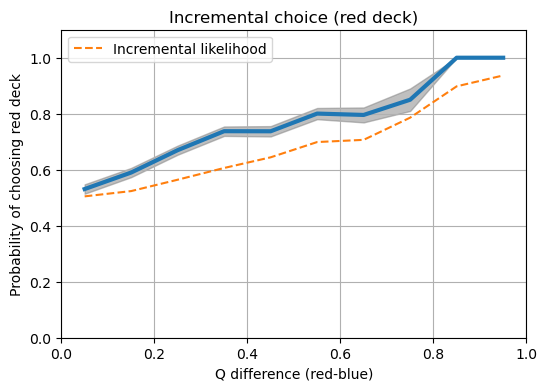

binning data...


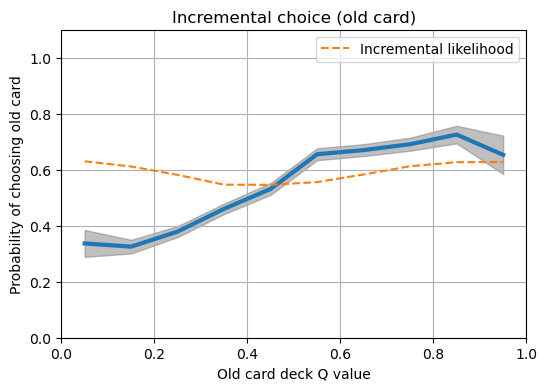

In [347]:
#   red deck q value vs likelihood of choosing red deck
data['Q_diff_rb'] = data['Q_red'] - data['Q_blue']
pf.simple_plot(data, x_var='Q_diff_rb', y_var='ChooseRed', bin=True, bins = np.linspace(0,1,11),
               xlabel='Q difference (red-blue)', ylabel='Probability of choosing red deck',
               y2='Inc_lik', y2_label = 'Incremental likelihood', legend=True, ylim=(0,1.1), xticks=np.arange(6)/5,
               title='Incremental choice (red deck)')

#   old card deck q-value vs. likelihood of choosing deck
data["Q_old"] = np.select(
    [data["OldDeck"] == 2, data["OldDeck"] == 1],  
    [data["Q_red"], data["Q_blue"]],  
    default=np.nan  
)
pf.simple_plot(data, x_var='Q_old', y_var='OldObjC', bin=True, bins = np.linspace(0,1,11),
               xlabel='Old card deck Q value', ylabel='Probability of choosing old card',
               y2='Inc_lik', y2_label = 'Incremental likelihood', legend=True, ylim=(0,1.1), xticks=np.arange(6)/5,

               title='Incremental choice (old card)')

do participants use episodic information? old card value vs. likelihood of choosing it

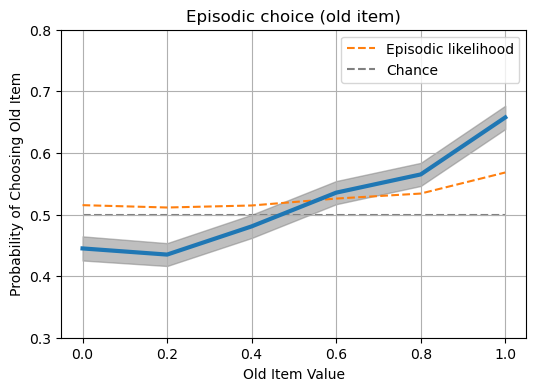

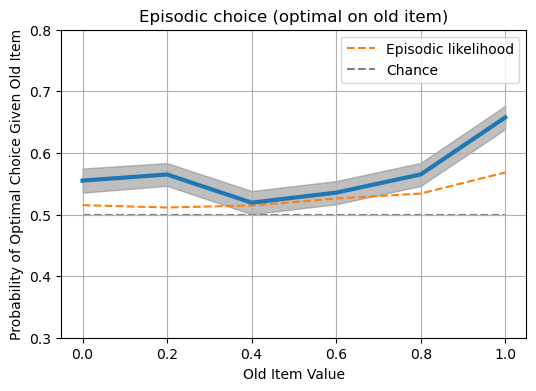

In [351]:
# old value vs old choice
pf.simple_plot(data, x_var='ObjPP', y_var='OldObjC', ylim=(0.3,0.8), chance=0.5,
               xlabel='Old Item Value', ylabel='Probability of Choosing Old Item',
               y2='Ep_lik', y2_label = 'Episodic likelihood', legend=True,
               title='Episodic choice (old item)')
# old value vs. optimal choice
pf.simple_plot(data, x_var='ObjPP', y_var='OptObj', ylim=(0.3,0.8),chance=0.5,
               xlabel='Old Item Value', ylabel='Probability of Optimal Choice Given Old Item',
               y2='Ep_lik', y2_label = 'Episodic likelihood', legend=True,  
               title='Episodic choice (optimal on old item)')

binning data...


/Users/chrisiyer/_Current/lab/code/hybrid_rl_local/analysis/plotting_fxns.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = data.groupby(x_var)[y_var].agg(['count','mean','sem'])
/Users/chrisiyer/_Current/lab/code/hybrid_rl_local/analysis/plotting_fxns.py:84: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data2 = data.groupby(x_var)[y2].mean()


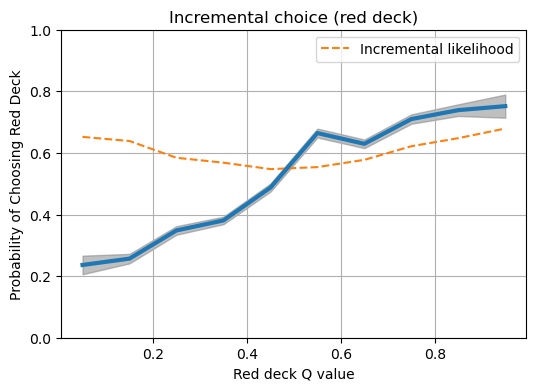

binning data...


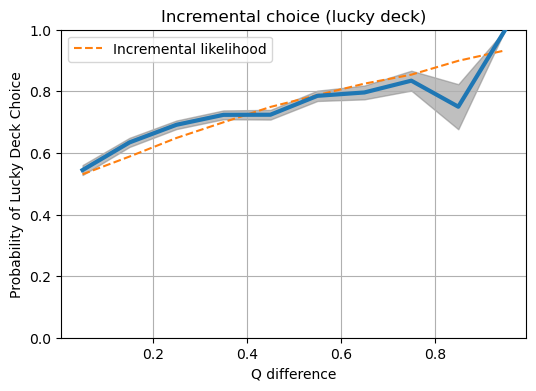

In [352]:
# do participants use incremental information? 
#   red deck q value vs likelihood of choosing red deck

pf.simple_plot(data, x_var='Q_red', y_var='ChooseRed', bin=True, bins = np.linspace(0,1,11),
               ylim=(0,1),
               xlabel='Red deck Q value', ylabel='Probability of Choosing Red Deck',
               y2='Inc_lik', y2_label = 'Incremental likelihood', legend=True,
               title='Incremental choice (red deck)')
pf.simple_plot(data, x_var='Q_diff', y_var='LuckyDeckC', bin=True, bins = np.linspace(0,1,11),
               ylim=(0,1),
               xlabel='Q difference', ylabel='Probability of Lucky Deck Choice',
               y2='Inc_lik', y2_label = 'Incremental likelihood', legend=True,
               title='Incremental choice (lucky deck)')

#   old card deck q-value vs. likelihood of choosing deck

### Encoding effects

memory success by delay

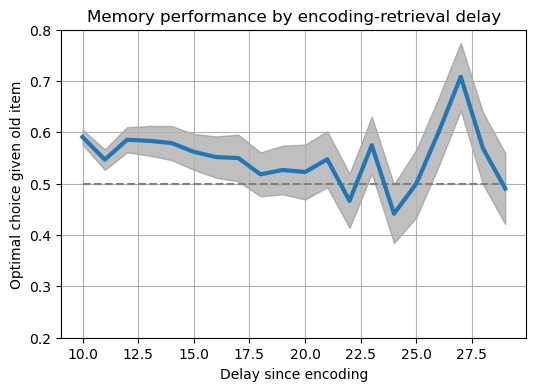

In [335]:
pf.simple_plot(data, x_var='Delay',y_var='OptObj',xlabel='Delay since encoding', ylabel='Optimal choice given old item',
               ylim=(0.2,0.8), chance=0.5, title='Memory performance by encoding-retrieval delay')

memory success by encoding attributes

In [508]:
# add some attributes of the encoding trials
data["OldObjLuckyDeckEnc"] = np.nan
data["Q_chosen_enc"] = np.nan
data["Q_diff_enc"] = np.nan
data["PE_enc"] = np.nan
data["ValueDeckMatchEnc"] = np.nan
for idx, row in data[data["OldT"] == 1].iterrows():
    enc_idx = idx - int(row["Delay"]) 
    data.at[idx, "OldObjLuckyDeckEnc"] = data.at[enc_idx, "LuckyDeckC"]
    data.at[idx, "Q_chosen_enc"] = data.at[enc_idx, "Q_chosen"]
    data.at[idx, "Q_diff_enc"] = data.at[enc_idx, "Q_diff"]
    data.at[idx, "PE_enc"] = data.at[enc_idx, "PE"]

    LuckyDeckC_enc = data.at[enc_idx, "LuckyDeckC"]
    Outcome_enc = data.at[enc_idx, "Outcome"]
    data.at[idx, "ValueDeckMatchEnc"] = int(LuckyDeckC_enc == int(Outcome_enc > 0.5))

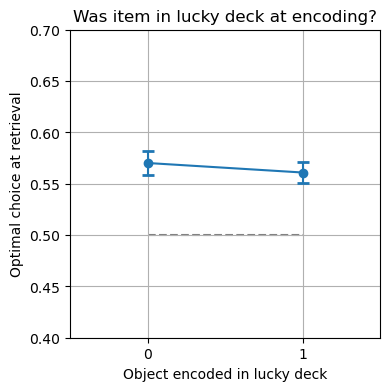

binning data...


/Users/chrisiyer/_Current/lab/code/hybrid_rl_local/analysis/plotting_fxns.py:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = data.groupby(x_var)[y_var].agg(['count','mean','sem'])


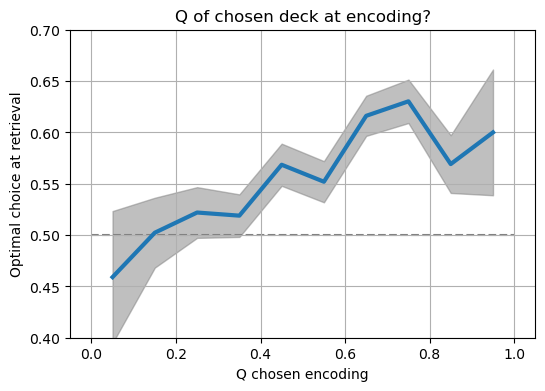

binning data...


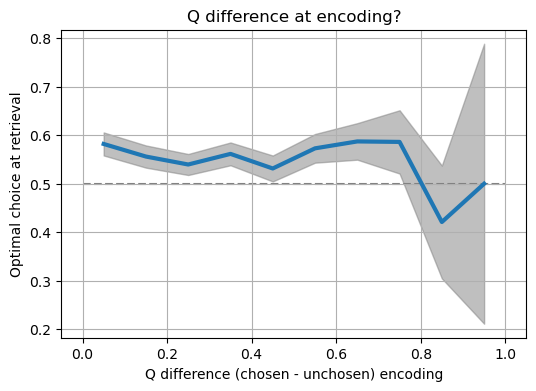

binning data...


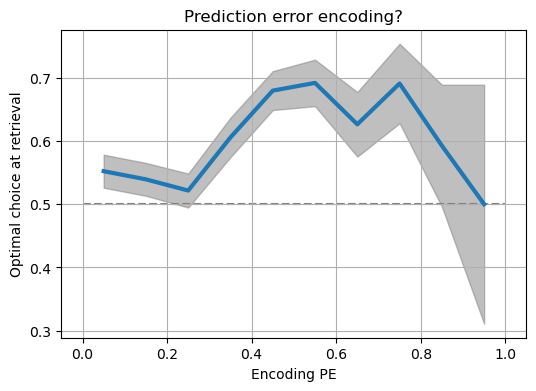

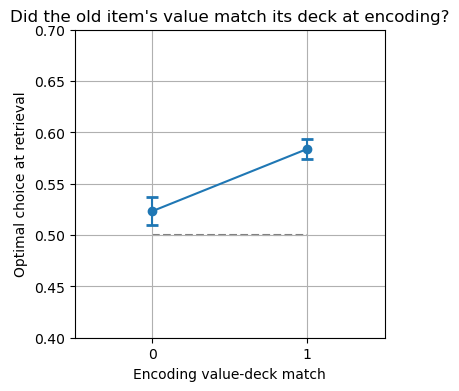

In [509]:
# was it in the lucky deck at time of encoding
pf.simple_plot_pair(data, x_var='OldObjLuckyDeckEnc',y_var='OptObj', chance=0.5,
                  xlabel = 'Object encoded in lucky deck', 
                  ylabel='Optimal choice at retrieval',
                  title='Was item in lucky deck at encoding?',
                  xlim=(-0.5,1.5), xticks=(0,1),ylim=(0.4,0.7))

# q chosen at time of encoding
pf.simple_plot(data, x_var='Q_chosen',y_var='OptObj', chance=0.5,
                  xlabel = 'Q chosen encoding', bins=np.arange(11)/10,
                  ylabel='Optimal choice at retrieval',
                  title='Q of chosen deck at encoding?',
                  ylim=(0.4,0.7))

# q diff at time of encoding
pf.simple_plot(data, x_var='Q_diff_enc',y_var='OptObj', chance=0.5,
                  xlabel = 'Q difference (chosen - unchosen) encoding', bins=np.arange(11)/10,
                  ylabel='Optimal choice at retrieval',
                  title='Q difference at encoding?',)

# PE at time of encoding
pf.simple_plot(data, x_var='PE_enc',y_var='OptObj', chance=0.5,
                  xlabel = 'Encoding PE', bins=np.arange(11)/10,
                  ylabel='Optimal choice at retrieval',
                  title='Prediction error encoding?',)

# did its value match its deck? (
pf.simple_plot_pair(data, x_var='ValueDeckMatchEnc',y_var='OptObj', chance=0.5,
                  xlabel = 'Encoding value-deck match', 
                  ylabel='Optimal choice at retrieval',
                  title='Did the old item\'s value match its deck at encoding?',
                  xlim=(-0.5,1.5), xticks=(0,1),ylim=(0.4,0.7))

### Reversal effects

effect of reversal on overall performance, lucky deck choice, and on old card choice (+each run)


/Users/chrisiyer/_Current/lab/code/hybrid_rl_local/analysis/plotting_fxns.py:78: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  


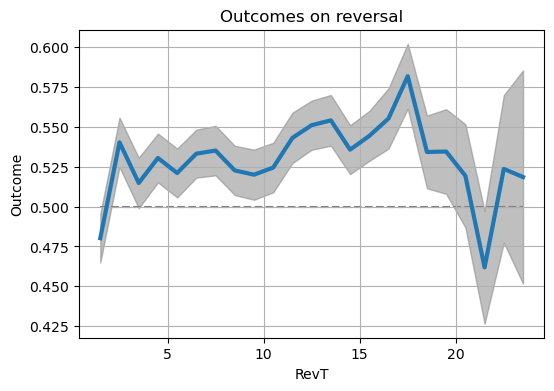

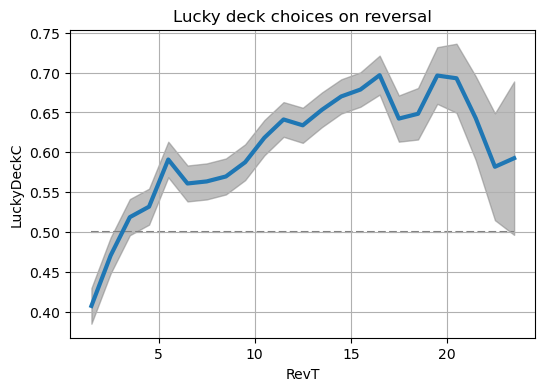

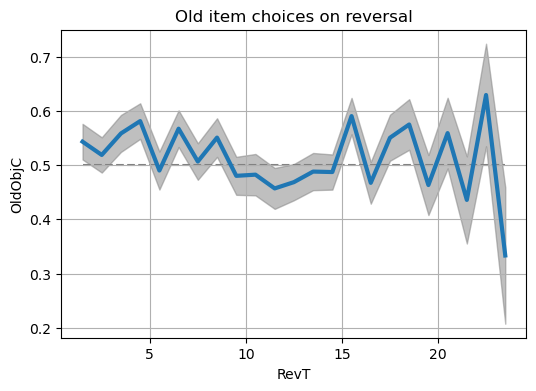

In [515]:
# revT against overall performance
pf.simple_plot(data, x_var = 'RevT', y_var = 'Outcome', chance=0.5,
               x_label = 'Trials Since Reversal', y_text='Average reward',
               title = 'Outcomes on reversal', bins = data.RevT.unique())

# revT against lucky deck choices
pf.simple_plot(data, x_var = 'RevT', y_var = 'LuckyDeckC',  chance=0.5,
               x_label = 'Trials Since Reversal', y_text='Lucky deck choice prob',
               title = 'Lucky deck choices on reversal', bins = data.RevT.unique())

# revT against old card choice
pf.simple_plot(data, x_var = 'RevT', y_var = 'OldObjC',  chance=0.5,
               x_label = 'Trials Since Reversal', y_text='Old item choice prob',
               title = 'Old item choices on reversal', bins = data.RevT.unique())

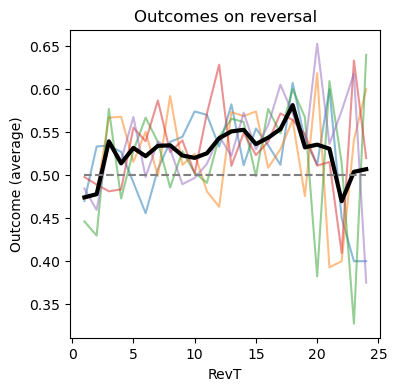

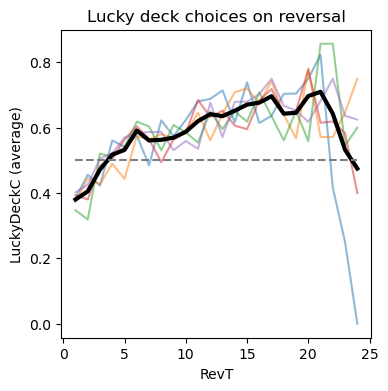

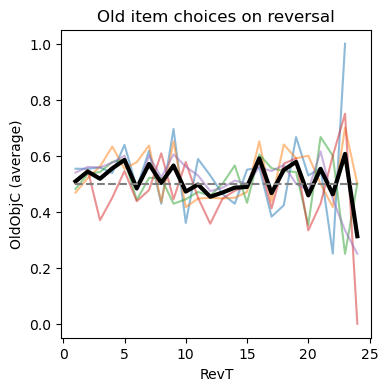

In [520]:
# same but separating runs
# revT against overall performance
pf.overall_plot(data, x_var = 'RevT', y_var = 'Outcome', grouping_var='Run', chance=0.5,
               x_label = 'Trials Since Reversal', y_text='Average reward',
               title = 'Outcomes on reversal', bins = data.RevT.unique()) # , legend=True)
# revT against lucky deck choices
pf.overall_plot(data, x_var = 'RevT', y_var = 'LuckyDeckC', grouping_var='Run',  chance=0.5,
               x_label = 'Trials Since Reversal', y_text='Lucky deck choice prob',
               title = 'Lucky deck choices on reversal', bins = data.RevT.unique())# , legend=True)

# revT against old card choice
pf.overall_plot(data, x_var = 'RevT', y_var = 'OldObjC',  grouping_var='Run', chance=0.5,
               x_label = 'Trials Since Reversal', y_text='Old item choice prob',
               title = 'Old item choices on reversal', bins = data.RevT.unique())# , legend=True)

### Lingering memory modes

does the previous trial's memory performance bias the current trial?


- OBJECT USE: limit to just *consecutive* pairs of old/new trials
    - separate by memory performance (optimal choice) on first trial of the pair
    - plot value of old object vs. old choice for second trial of the pair 
- DECK USE: 
    - preceding deck outcome on the x, compare successful old/new last trial vs. wrong old/new last trial to prob of staying with deck 
- same as above, but instead of comparing previous trial correct old/new vs. incorrect old new, we will compare previous trial correct old/new vs. prev trial new/new

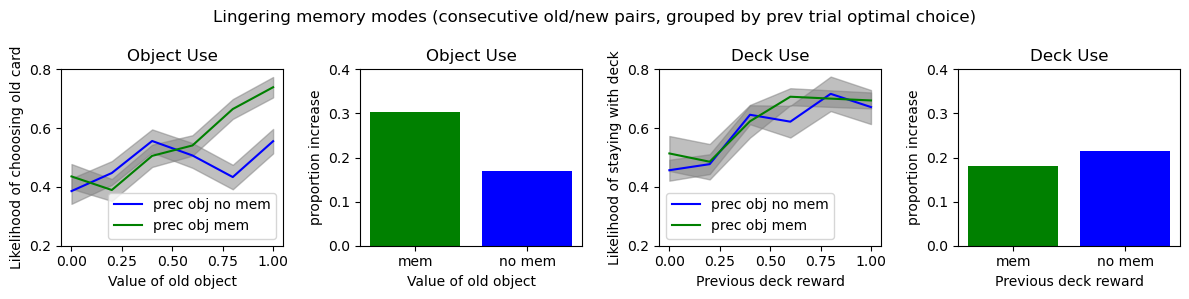

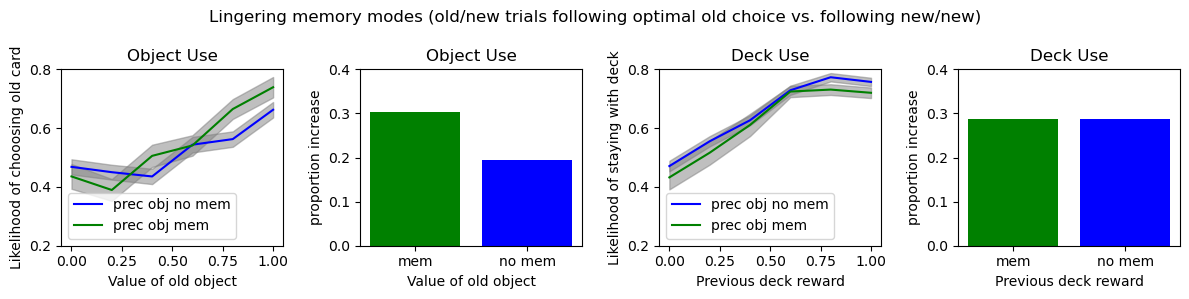

In [548]:
pf.plot_lingering_modes(data, consecutive_pairs=True, oldnew_vs_newnew=False,
                        title = 'Lingering memory modes (consecutive old/new pairs, grouped by prev trial optimal choice)')

pf.plot_lingering_modes(data, consecutive_pairs=False, oldnew_vs_newnew=True,
                        title = 'Lingering memory modes (old/new trials following optimal old choice vs. following new/new)')

### Understanding likelihoods

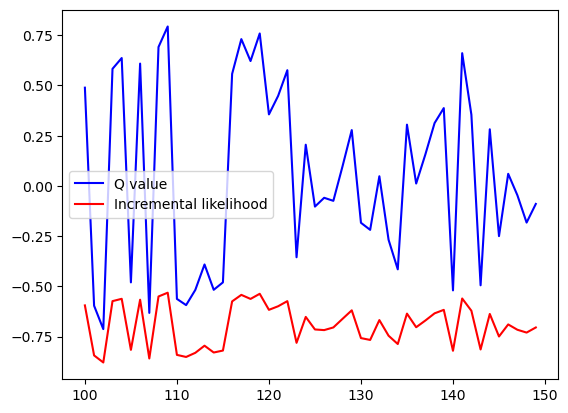

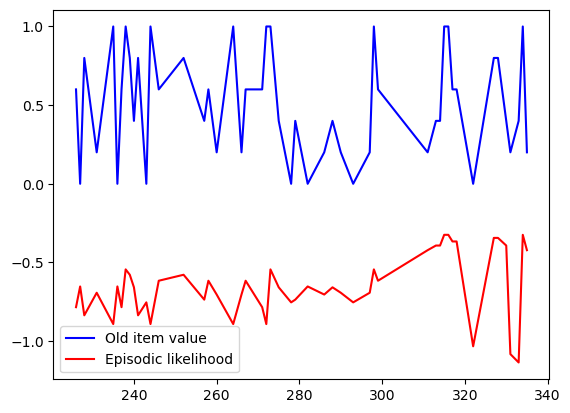

In [556]:
# sanity check -- do Q value (Q_diff) and Inc_lik scale together? 
# do Old value and Ep_lik scale together?
i = 100
j = 50
plt.plot(data.Q_diff[i:i+j], color='blue', label='Q value')
plt.plot(data.Inc_lik[i:i+j], color='red', label='Incremental likelihood')
plt.legend()
plt.show()

plt.plot(data[data.OldT==1].ObjPP[i:i+j], color='blue', label='Old item value')
plt.plot(data[data.OldT==1].Ep_lik[i:i+j], color='red', label='Episodic likelihood')
plt.legend()
plt.show()

### Object-deck mismatches

- old/new trials where old object is good but in bad deck, bad but in good deck

In [214]:
print(len(data[(data.RevT < 5)]))
len(data[(data.RevT < 5) & (data.OldT==1)])

2008


946

### Miscellaneous

does the old object being in the lucky deck affect its probability of being chosen?


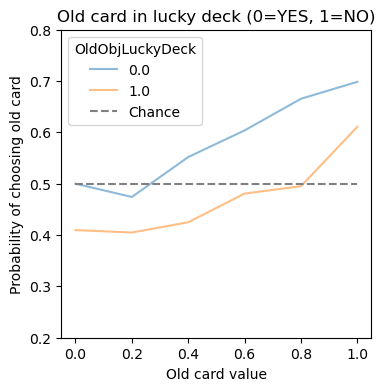

In [560]:
x_var = 'OldObjLuckyDeck' # 0 for YES, 1 for NO
pf.overall_plot(data, x_var='ObjPP',y_var='OldObjC',grouping_var='OldObjLuckyDeck', mean=False,
                    legend=True,
                    xlabel='Old card value',ylabel='Probability of choosing old card',
                    ylim=(0.2,0.8), chance=0.5, title='Old card in lucky deck (0=YES, 1=NO)')

previous payment from the deck that the old card appears in

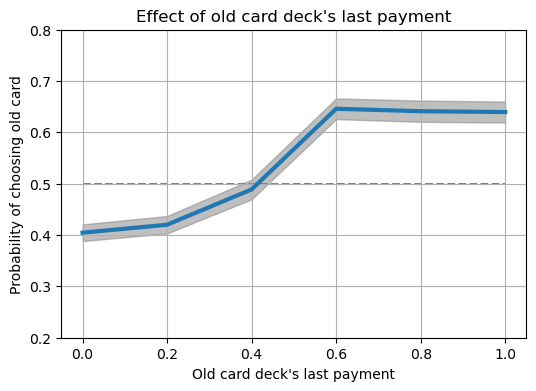

In [354]:
pf.simple_plot(data, x_var='OldDeckPP',y_var='OldObjC',xlabel='Old card deck\'s last payment',
                ylabel='Probability of choosing old card',
               ylim=(0.2,0.8), chance=0.5, title='Effect of old card deck\'s last payment')

# Issues

In [ ]:
# there are 59 trials with episodic likelihood but its not an old trial?
data[data.Ep_lik.notna() & (data.OldT==0)]